# Transformación de Datos con Scikit-Learn

Vamos a mostrar algunas funcionalidades de Transformación de Datos con Scikit-Learn con algunos ejemplos sobre el dataset de Titanic, de la misma manera que hicimos con Pandas.

Primero importamos las librerías y cargamos el dataset

Cargamos las librerías y los datos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
### Carga de datos
df = pd.read_csv('../DataSets/Titanic.csv')
print(df.shape)
df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Imputación de valores faltantes con Scikit-Learn

Una cosa para tener en cuenta es que a Scikit-Learn no le gustan los valores faltantes, por lo que una de las primeras cosas que tendremos que hacer es imputarlos. En el módulo `sklearn.impute`, del cual recomendamos mirar su [documentación](https://scikit-learn.org/stable/modules/impute.html#impute), pueden encontrar algunas clases útiles para esta tarea.

El imputador más sencillo es el `SimpleImputer`, el cual nos servirá para rellenar valores faltantes en las columnas que elijamos. Mirar el siguiente ejemplo y explorar cuáles son los parámetros de ese objeto.

In [4]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [5]:
edades = df.Age.values
imp.fit(edades.reshape(-1,1))
print(imp.statistics_)

[29.69911765]


In [6]:
edades_imputed = imp.transform(edades.reshape(-1,1))
print(edades_imputed[:10])
print(edades_imputed.shape)

[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]]
(891, 1)


Y, si queremos agregarlas al DataFrame,

In [10]:
df['Age_imputed'] = edades_imputed
df.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### Discretización y binning con Scikit-Learn

La principal diferencia entre Scikit-Learn y Pandas es que Scikit-Learn decide los límites de los bines de acuerdo a una estrategia que le pasemos. La clase que vamos a usar se llama `KBinsDiscretizer`.

In [8]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy = 'uniform')

Separamos los valores que queremos fitear.

In [9]:
edades = df.Age_imputed.values
print(edades.reshape(-1,1).shape)

(891, 1)


Y fiteamos el estimador

In [11]:
est.fit(edades.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', strategy='uniform')

Miramos los límites de cada bin

In [12]:
est.bin_edges_

array([array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])],
      dtype=object)

In [13]:
bines_asignados = est.transform(edades.reshape(-1,1))
print(bines_asignados)

[[1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [3.]
 [0.]
 [1.]
 [0.]
 [0.]
 [3.]
 [1.]
 [2.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [4.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [3.]
 [1.]
 [4.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [3.]
 [1.]
 [4.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [3.]
 [1.]
 [3.]
 [2.]
 [1.]
 [3.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.

Y agregamos al dataframe

In [14]:
df['rangos_etarios_scikit'] = bines_asignados
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,rangos_etarios_scikit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1.0


Se puede hacer en una sola línea con `.fit_transform`

In [15]:
df['rangos_etarios_scikit'] = est.fit_transform(edades.reshape(-1,1))
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,rangos_etarios_scikit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,2.0


¿Cuáles son las estrategias posibles del `KBinsDiscretizer`?¿Qué formas tiene de *encodear* la salida?

### `OneHotEncoder`

El caballito de batalla es el `OneHotEncoder`.

In [31]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False)

In [32]:
generos = df.Sex.values.reshape(-1,1)
print(np.unique(generos))

['female' 'male']


In [33]:
onehot_encoder.fit(generos)

OneHotEncoder(sparse=False)

In [34]:
onehot_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [57]:
generos_encoded = onehot_encoder.transform(generos)
print(generos_encoded)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [58]:
onehot_encoder.inverse_transform(generos_encoded[500].reshape(1,-1))

array([['male']], dtype=object)

In [59]:
df['female_encoded'] = generos_encoded[:,0]
df['male_encoded'] = generos_encoded[:,1]

In [60]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,rangos_etarios_scikit,female_encoded,male_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,2.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,2.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,2.0,0.0,1.0


### Ejercitación

Tomar el dataset 'heart.csv' y hacer la transformación de datos que hicieron con Pandas, pero ahora con Scikit-Learn. Transformar la columna `sex` con una `LabelEncoder` y la columna `thal` con un `OneHotEncoder`.

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [62]:
### Carga de datos
df2 = pd.read_csv('../DataSets/heart.csv')
print(df2.shape)
df2.head(5)

(180, 15)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


In [63]:
le.fit(df2['sex'])
print(le.classes_)

['female' 'male']


In [64]:
df2['sex_le'] = le.transform(df2['sex'])
df2.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,sex_le
0,0z64un,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0,1
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0,1


In [65]:
onehot_encoder2 = OneHotEncoder(sparse = False)

In [66]:
thales = df2.thal.values.reshape(-1,1)
print(np.unique(thales))

['fixed_defect' 'normal' 'reversible_defect']


In [67]:
onehot_encoder2.fit(thales)

OneHotEncoder(sparse=False)

In [68]:
onehot_encoder2.categories_

[array(['fixed_defect', 'normal', 'reversible_defect'], dtype=object)]

In [69]:
thales_encoded = onehot_encoder2.transform(thales)
print(thales_encoded)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0.

In [70]:
df2['fixed_defect_encoded'] = thales_encoded[:,0]
df2['nromal_encoded'] = thales_encoded[:,1]
df2['reversible_defect_encoded'] = thales_encoded[:,2]
df2.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,sex_le,fixed_defect_encoded,nromal_encoded,reversible_defect_encoded
0,0z64un,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0,1,0.0,1.0,0.0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0,0,0.0,1.0,0.0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1,1,0.0,1.0,0.0
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1,1,0.0,0.0,1.0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0,1,0.0,0.0,1.0


## Metodos de selección automatica de features con Scikit-Learn

In [71]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,rangos_etarios_scikit,female_encoded,male_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,22.0,1.0,0.0,1.0


In [72]:
from sklearn.feature_selection import SelectKBest

In [73]:
from sklearn.feature_selection import mutual_info_regression

In [74]:
selector = SelectKBest(mutual_info_regression, k=4)

In [75]:
X = df[['Pclass','SibSp','Parch','Fare','rangos_etarios_scikit','female_encoded']] 

In [76]:
y = df[['Survived']]

In [77]:
selector.fit(X,y)

C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x0000020B83C75EE0>)

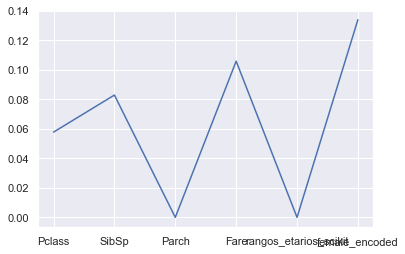

In [78]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(6),list(X.columns));

In [79]:
scores

array([0.05780123, 0.08293004, 0.        , 0.10589558, 0.        ,
       0.13401872])

In [80]:
list(X.columns)

['Pclass', 'SibSp', 'Parch', 'Fare', 'rangos_etarios_scikit', 'female_encoded']

#### Vemos que nos devuelve que los campos Fare y female_encoded (Sexo) son los mas aptos, veamos que pasa si lo intentamos deducir visualmente

In [81]:
X_corr = df[['Survived','Pclass', 'SibSp', 'Parch', 'Fare', 'rangos_etarios_scikit', 'female_encoded']]

In [82]:
import seaborn as sns

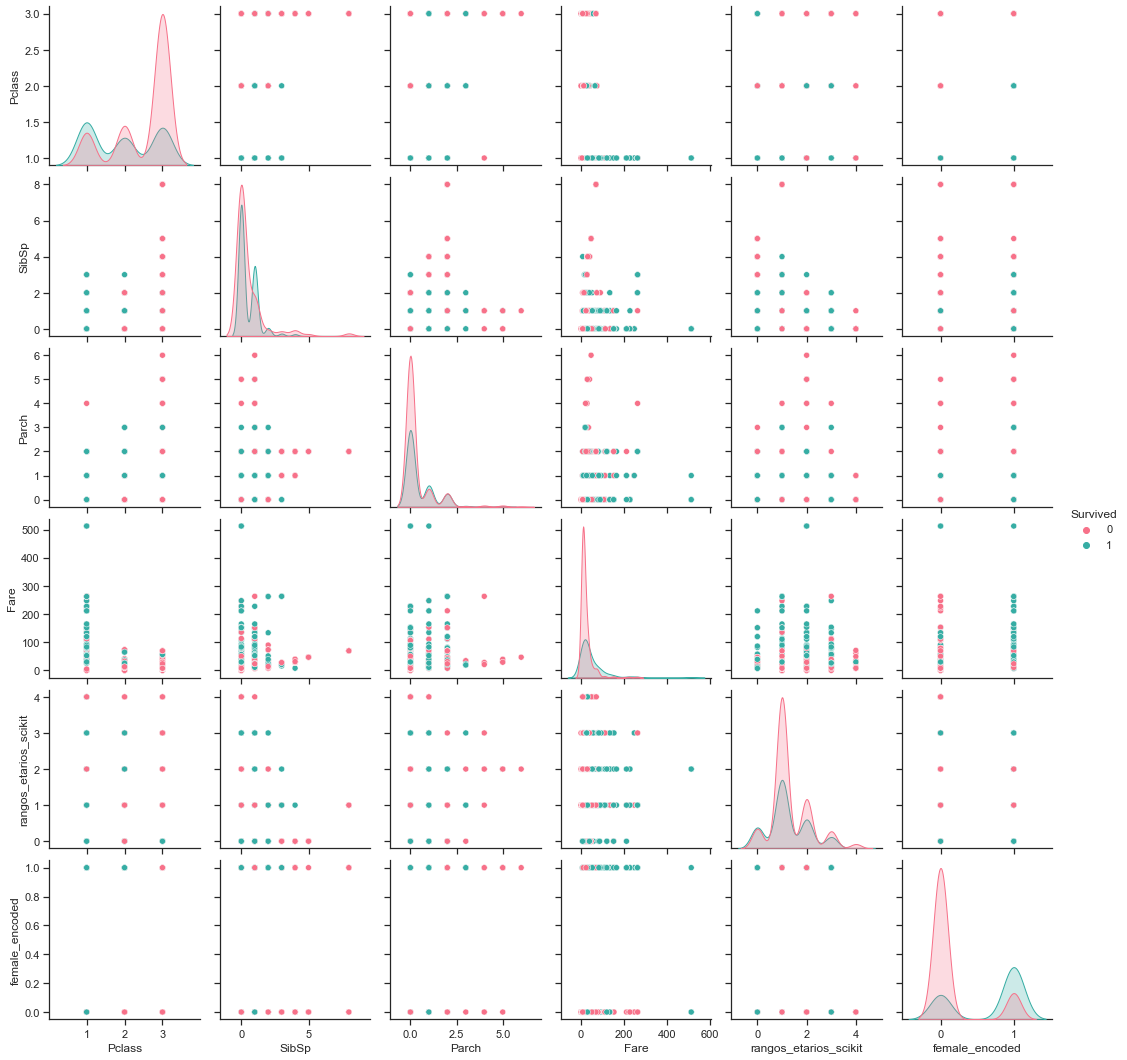

In [83]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(X_corr, diag_kind='kde', hue="Survived", palette="husl")

In [84]:
X_corr.corr()

,Survived,Pclass,SibSp,Parch,Fare,rangos_etarios_scikit,female_encoded
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,-0.043800,0.543351
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.358769,-0.131900
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.218747,0.114631
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,-0.135227,0.245489
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.123640,0.182333
rangos_etarios_scikit,-0.043800,-0.358769,-0.218747,-0.135227,0.123640,1.000000,-0.070220
female_encoded,0.543351,-0.131900,0.114631,0.245489,0.182333,-0.070220,1.000000


C:\Users\Julian\AppData\Local\Temp\ipykernel_14996\2658425602.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)


<AxesSubplot:>

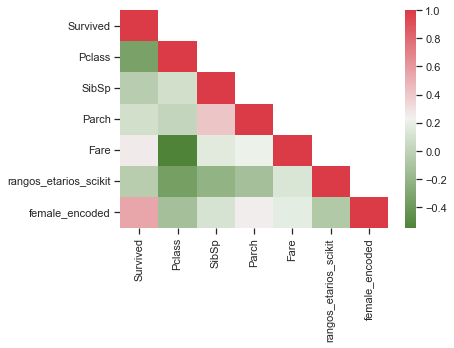

In [85]:
# Sacamos el id
dt = X_corr

corr = dt.corr() #returns a dataframe, so it can be reused

# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)

# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(corr, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Vemos que los campos mas correlacionados con Survived, son Pclass y female_encoded (Sexo) con lo que serian los mas aptos, sin embargo, tengamos en cuenta, que Fare es el costo del boleto, que esta relacionado con Pclass